# Problema de la mochila

## Análisis de tiempos

In [31]:
%matplotlib inline
import timeit
import random
import matplotlib.pyplot as plt
import numpy as np
from math import floor

from functools import partial

from knapsack_file_parser import Parser
from knapsack import knapsack_bottom_up, knapsack_top_down

In [32]:
def plot_algorithms(problems, title='', savefig=False, filename_keyword=''):

    x, td_y, bu_y = [], [], []
    td_times, bu_times = [], []
    weight = 0

    for problem in problems:

        if problem.id % 3 == 0:
            print(str(problem.id))
            td_timer = timeit.Timer(partial(knapsack_top_down, problem.values, problem.weights, problem.knapsack_weight))
            td_times.append(td_timer.timeit(1))
            bu_timer = timeit.Timer(partial(knapsack_bottom_up, problem.values, problem.weights, problem.knapsack_weight))
            bu_times.append(bu_timer.timeit(1))

            td_t = np.mean(td_times)
            bu_t = np.mean(bu_times)

            td_y.append(td_t)
            bu_y.append(bu_t)

            x.append(problem.knapsack_weight)
            weight = problem.knapsack_weight

    plt.plot(x, td_y, label = 'Top-Down Solution')
    plt.plot(x, bu_y, label = 'Bottom-Up Solution')

    plt.title(title)
    plt.ylabel('Tiempo de ejecución')
    plt.xlabel('Peso de la mochila')
    plt.legend(loc='upper left', prop={'size': 10})
    if savefig:
        # el nombre del archivo es: n_cantItems_maxWeight_123123.png
        filename = '_'.join(["n", str(len(problems[0].values)), 'maxWeight', str(weight)])
        plt.savefig('images/' + filename + filename_keyword +'.png', bbox_inches='tight')
    plt.show()

problems = Parser.parse_file('test_files/small_coef/knapPI_1_100_1000.csv')
list.sort(problems)
title = 'Caso Simple: N = 100'
plot_algorithms(problems, title = title, savefig = True)

3
24
6
69
9
12
15
36
21
30
48
45
18
27
39
33
75
42
84
51
63
54
60
87
57
72
93
96
78
81
66
99
90


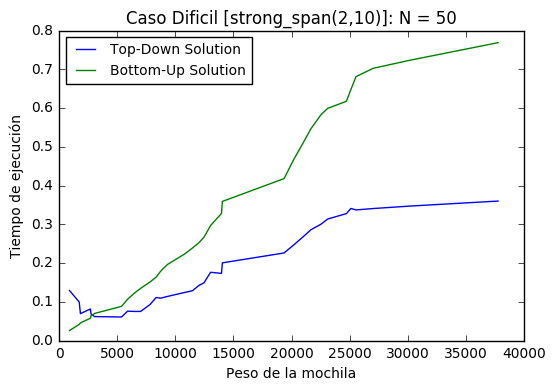

In [33]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_13_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [strong_span(2,10)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='sspan')

3
6
24
9
69
12
21
15
30
36
45
48
18
27
84
39
33
42
75
63
51
60
93
72
54
96
87
78
57
81
66
99
90


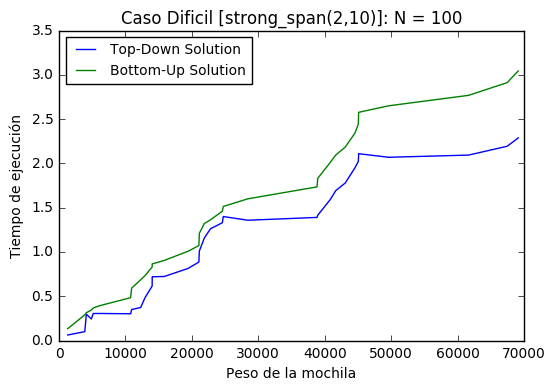

In [34]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_13_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [strong_span(2,10)]: N = 100'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='sspan')

24
3
6
9
21
30
12
63
36
15
18
39
27
33
87
57
84
42
48
45
75
60
93
69
90
51
66
81
96
54
78
72
99


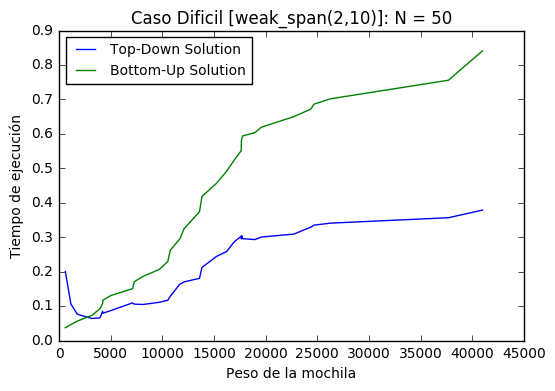

In [35]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_12_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [weak_span(2,10)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='wspan')

24
3
6
9
12
30
21
63
36
15
18
39
27
87
84
33
57
42
48
45
69
90
60
75
51
93
66
96
81
54
78
72
99


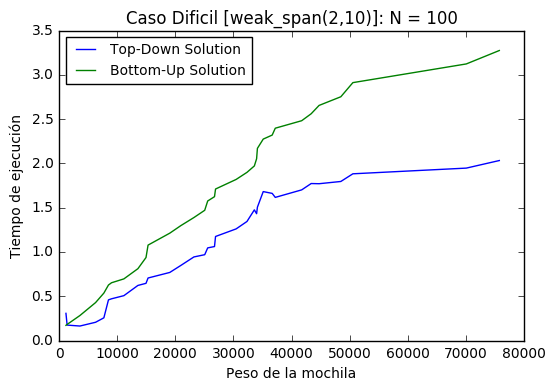

In [36]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_12_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [weak_span(2,10)]: N = 100'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='wspan')

24
3
6
9
12
30
21
63
36
15
18
39
27
87
84
33
57
42
48
45
69
90
60
75
51
93
66
96
81
54
78
72
99


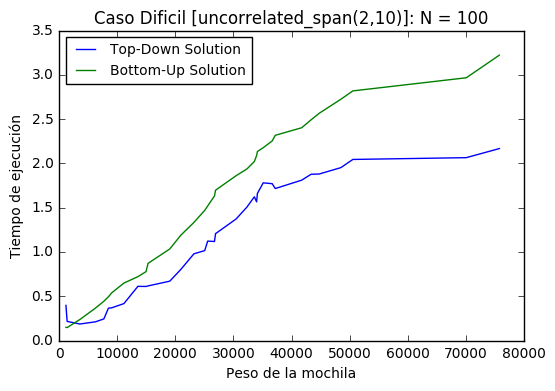

In [37]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_11_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [uncorrelated_span(2,10)]: N = 100'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='uspan')

24
3
6
9
21
30
12
63
36
15
18
39
27
33
87
57
84
42
48
45
75
60
93
69
90
51
66
81
96
54
78
72
99


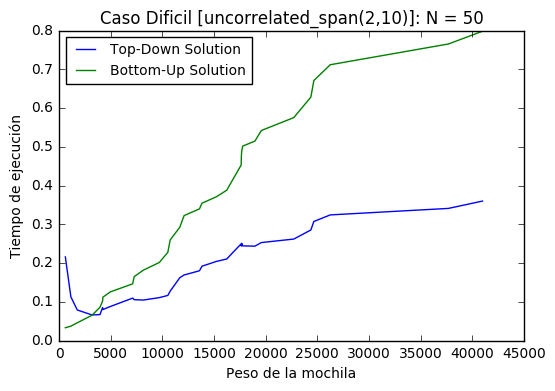

In [38]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_11_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [uncorrelated_span(2,10)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='uspan')

3
6
9
12
18
15
21
24
36
27
30
33
45
42
39
51
48
60
63
78
54
57
69
66
72
75
84
96
87
93
81
99
90


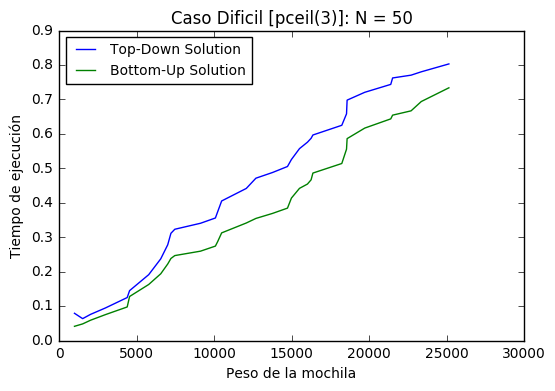

In [39]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_15_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [pceil(3)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='pceil')

3
6
9
12
15
18
21
24
27
36
30
33
45
39
42
48
51
54
57
63
60
66
69
78
75
72
87
81
84
96
93
90
99


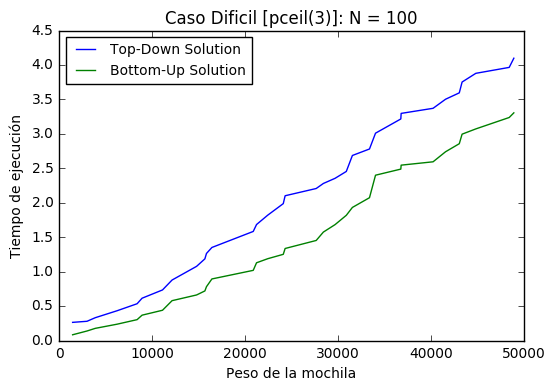

In [30]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_15_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [pceil(3)]: N = 100'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='pceil')

3
6
9
12
15
18
21
24
27
36
30
33
45
39
42
48
51
54
57
63
60
66
69
78
75
72
87
81
84
96
93
90
99


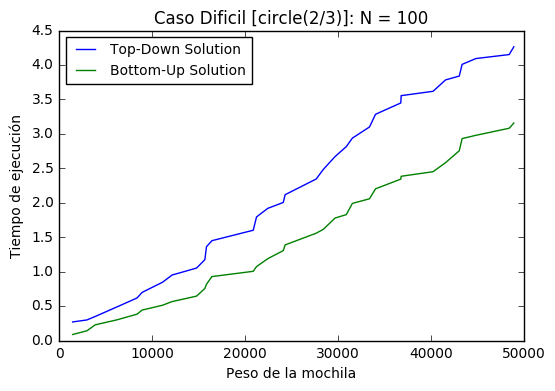

In [27]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_16_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [circle(2/3)]: N = 100'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='circle')

3
6
9
12
18
15
21
24
36
27
30
33
45
42
39
51
48
60
63
78
54
57
69
66
72
75
84
96
87
93
81
99
90


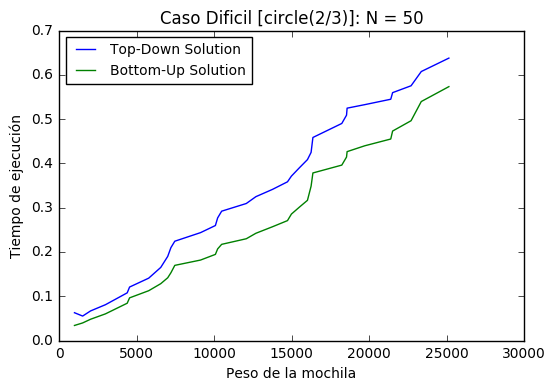

In [21]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_16_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [circle(2/3)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='circle')

3
6
9
12
18
15
21
24
36
27
30
33
45
42
39
51
48
60
63
78
54
57
69
66
72
75
84
96
87
93
81
99
90


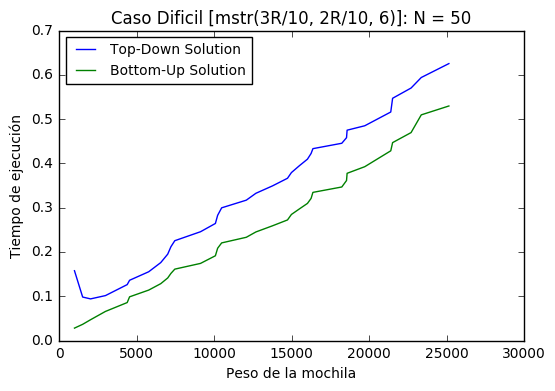

In [18]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_14_50_1000.csv')
list.sort(problems)
title = 'Caso Dificil [mstr(3R/10, 2R/10, 6)]: N = 50'
plot_algorithms(problems, title = title, savefig = True, filename_keyword='mstr')

3
6
9
12
15
18
21
24
27
36
30
33
45
39
42
48
51
54
57
63
60
66
69
78
75
72
87
81
84
96
93
90
99


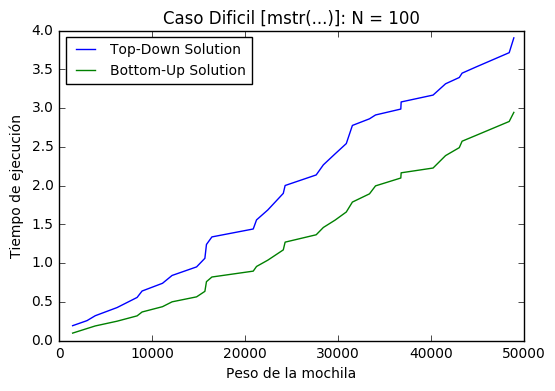

In [15]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_14_100_1000.csv')
list.sort(problems)
title = 'Caso Dificil [mstr(...)]: N = 100'
plot_algorithms(problems, title = title, savefig = True)

3
6
9
12
18
15
21
24
27
30
36
33
39
42
48
45
63
51
54
69
60
78
57
66
84
72
75
96
93
81
87
90
99


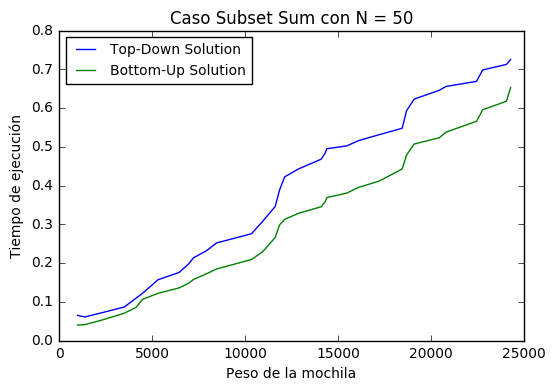

In [12]:
problems = Parser.parse_file('test_files/small_coef/knapPI_6_50_1000.csv')
list.sort(problems)
title = 'Caso Subset Sum con N = 50'
plot_algorithms(problems, title = title, savefig = True)

3
6
9
12
15
18
21
24
27
33
30
39
36
48
42
45
54
63
51
60
69
57
66
75
72
78
84
81
93
87
90
99
96


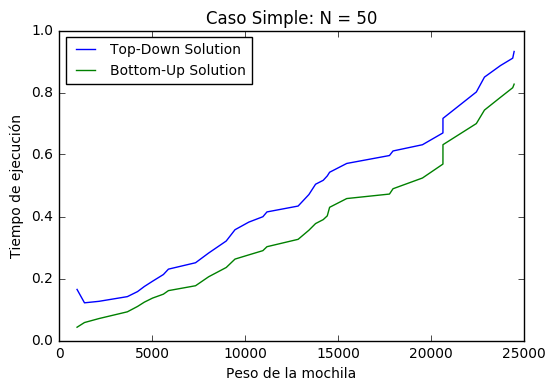

In [26]:
problems = Parser.parse_file('test_files/small_coef/knapPI_1_50_1000.csv')
list.sort(problems)
title = 'Caso Simple: N = 50'
plot_algorithms(problems, title = title, savefig = True)

3
6
9
12
15
18
21
24
27
30
33
36
39
42
45
48
51
60
63
54
57
69
66
78
72
75
84
81
93
96
87
99
90


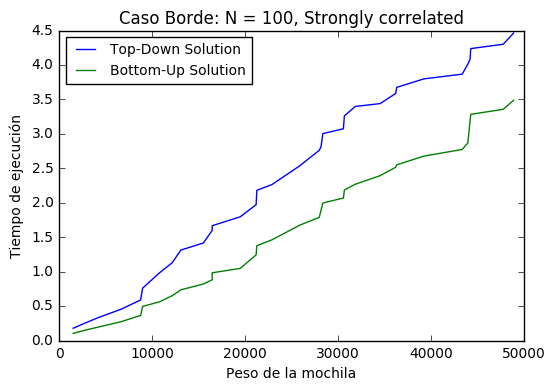

In [18]:
problems = Parser.parse_file('test_files/small_coef/knapPI_3_100_1000.csv')
list.sort(problems)
title = 'Caso Borde: N = 100, Strongly correlated'
plot_algorithms(problems, title = title, savefig = True)

5
10
15
20
25
30
35
45
40
50
55
60
65
80
70
75
85
95
100
90


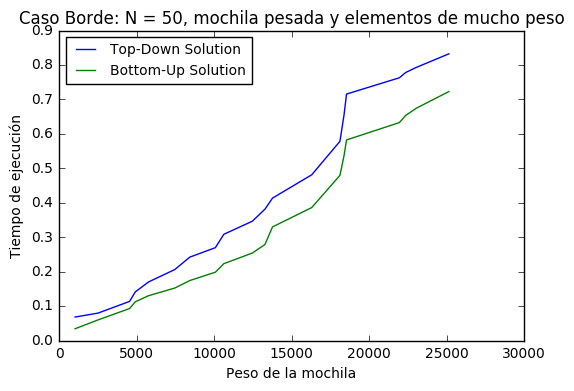

In [15]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_16_50_1000.csv')
list.sort(problems)
title = 'Caso Borde: N = 50, mochila pesada y elementos de mucho peso'
plot_algorithms(problems, title = title, savefig = True)

5
10
35
30
25
15
50
20
70
40
55
45
75
60
90
95
80
65
85
100


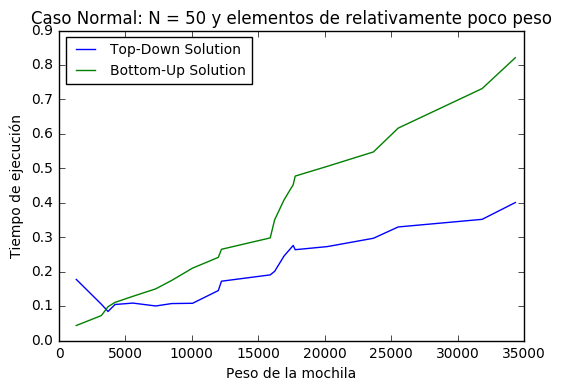

In [12]:
problems = Parser.parse_file('test_files/hard_coef/knapPI_11_50_1000.csv')
list.sort(problems)
title = 'Caso Normal: N = 50 y elementos de relativamente poco peso'
plot_algorithms(problems, title = title, savefig = True)

In [9]:
problems = Parser.parse_file('test_files/small_coef/knapPI_1_500_1000.csv')
list.sort(problems)
title = 'Caso Normal: N = 500 y elementos de relativamente poco peso'
plot_algorithms(problems, title = title, savefig = True)

5
10


KeyboardInterrupt: 

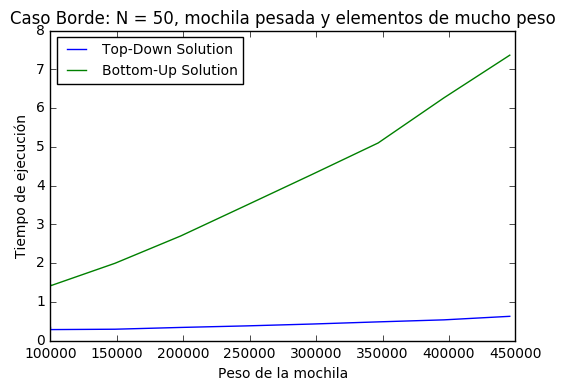

In [22]:
problems = Parser.parse_file('test_files/small_coef/knapPI_9_50_1000.csv')
list.sort(problems)
title = 'Caso Borde: N = 50, mochila pesada y elementos de mucho peso'
plot_algorithms(problems, title = title, savefig = True)